In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [155]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False


In [156]:
file_path = "./고용노동부_연도별 최저임금_20210805.csv"
data = pd.read_csv(file_path, encoding = 'euc-kr')
data

,연도,시간급
0,2022,9160
1,2021,8720
2,2020,8590
3,2019,8350
4,2018,7530
5,2017,6470
6,2016,6030
7,2015,5580
8,2014,5210


In [157]:
file_path = "./연도별_근로시간(2013-2021).xlsx"
data_time = pd.read_excel(file_path)
data_time

,한국표준직업분류6차,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,167.9,165.5,173.5,171.1,168.5,156.4,152.4,163.6,164.2
1,서비스 종사자(4),157.7,148.2,152.2,148.0,142.4,136.2,132.5,132.6,133.1
2,판매 종사자(5),163.4,163.2,170.4,166.1,161.9,151.1,147.3,154.8,152.5
3,단순노무 종사자(9),164.3,159.0,160.7,163.0,158.8,144.9,139.3,144.6,147.6


In [158]:
file_path = "./연도별_임금총액(2013-2021).xlsx"
data_pay = pd.read_excel(file_path)
data_pay

,한국표준직업분류6차,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,16067,16701,15978,16709,17381,19522,20573,19316,19806
1,서비스 종사자(4),9482,9212,8792,9196,9802,11043,12011,11837,12295
2,판매 종사자(5),12831,13242,12678,13538,13734,15651,16813,16131,16398
3,단순노무 종사자(9),9117,9471,9358,10212,11166,12603,13259,13131,13074


In [ ]:
pay_list = []

for i in range(len(pay_df)-1):
    pay_list.append(pay_df['전직종'][i+1] - pay_df['전직종'][i] / pay_df['전직종'][i])
    
    # pay_per_df['전직종증가율'] = pay_list
    # pay_per_df['서비스증가율'] = pay_df['서비스'][i+1] - pay_df['서비스'][i] / pay_df['서비스'][i]
    # pay_per_df['판매증가율'] = pay_df['판매'][i+1] - pay_df['판매'][i] / pay_df['판매'][i]
    # pay_per_df['단순노무증가율'] = pay_df['단순노무'][i+1] - pay_df['단순노무'][i] / pay_df['단순노무'][i]
    
pay_per_df

In [159]:
data_pay_1 = data_pay

In [170]:
# 
for i in range(2013,2021) :
    data_pay_2 = (data_pay_1[i+1]-data_pay_1[i])/data_pay_1[i]
    
    print(data_pay_2)
    

0    0.039460
1   -0.028475
2    0.032032
3    0.038829
dtype: float64
0   -0.043291
1   -0.045593
2   -0.042592
3   -0.011931
dtype: float64
0    0.045750
1    0.045951
2    0.067834
3    0.091259
dtype: float64
0    0.040218
1    0.065898
2    0.014478
3    0.093420
dtype: float64
0    0.123180
1    0.126607
2    0.139581
3    0.128694
dtype: float64
0    0.053837
1    0.087657
2    0.074244
3    0.052051
dtype: float64
0   -0.061099
1   -0.014487
2   -0.040564
3   -0.009654
dtype: float64
0    0.025368
1    0.038692
2    0.016552
3   -0.004341
dtype: float64


In [174]:
pd.DataFrame(data_pay_2)

,0
0,0.025368
1,0.038692
2,0.016552
3,-0.004341


In [161]:
data_time.set_index("한국표준직업분류6차")


,2013,2014,2015,2016,2017,2018,2019,2020,2021
한국표준직업분류6차,,,,,,,,,
전직종,167.9,165.5,173.5,171.1,168.5,156.4,152.4,163.6,164.2
서비스 종사자(4),157.7,148.2,152.2,148.0,142.4,136.2,132.5,132.6,133.1
판매 종사자(5),163.4,163.2,170.4,166.1,161.9,151.1,147.3,154.8,152.5
단순노무 종사자(9),164.3,159.0,160.7,163.0,158.8,144.9,139.3,144.6,147.6


In [162]:
data_time = data_time.transpose()


In [163]:
data_time = data_time.iloc[1:,:]
data_time = data_time.reset_index()
data_time.columns = ["연도","전직종", "서비스 종사자(4)", "판매 종사자(5)", "단순노무 종사자(9)"]
data_time

,연도,전직종,서비스 종사자(4),판매 종사자(5),단순노무 종사자(9)
0,2013,167.9,157.7,163.4,164.3
1,2014,165.5,148.2,163.2,159.0
2,2015,173.5,152.2,170.4,160.7
3,2016,171.1,148.0,166.1,163.0
4,2017,168.5,142.4,161.9,158.8
5,2018,156.4,136.2,151.1,144.9
6,2019,152.4,132.5,147.3,139.3
7,2020,163.6,132.6,154.8,144.6
8,2021,164.2,133.1,152.5,147.6


In [164]:
data_time = data_time.set_index("연도")
data_time


,전직종,서비스 종사자(4),판매 종사자(5),단순노무 종사자(9)
연도,,,,
2013,167.9,157.7,163.4,164.3
2014,165.5,148.2,163.2,159.0
2015,173.5,152.2,170.4,160.7
2016,171.1,148.0,166.1,163.0
2017,168.5,142.4,161.9,158.8
2018,156.4,136.2,151.1,144.9
2019,152.4,132.5,147.3,139.3
2020,163.6,132.6,154.8,144.6
2021,164.2,133.1,152.5,147.6


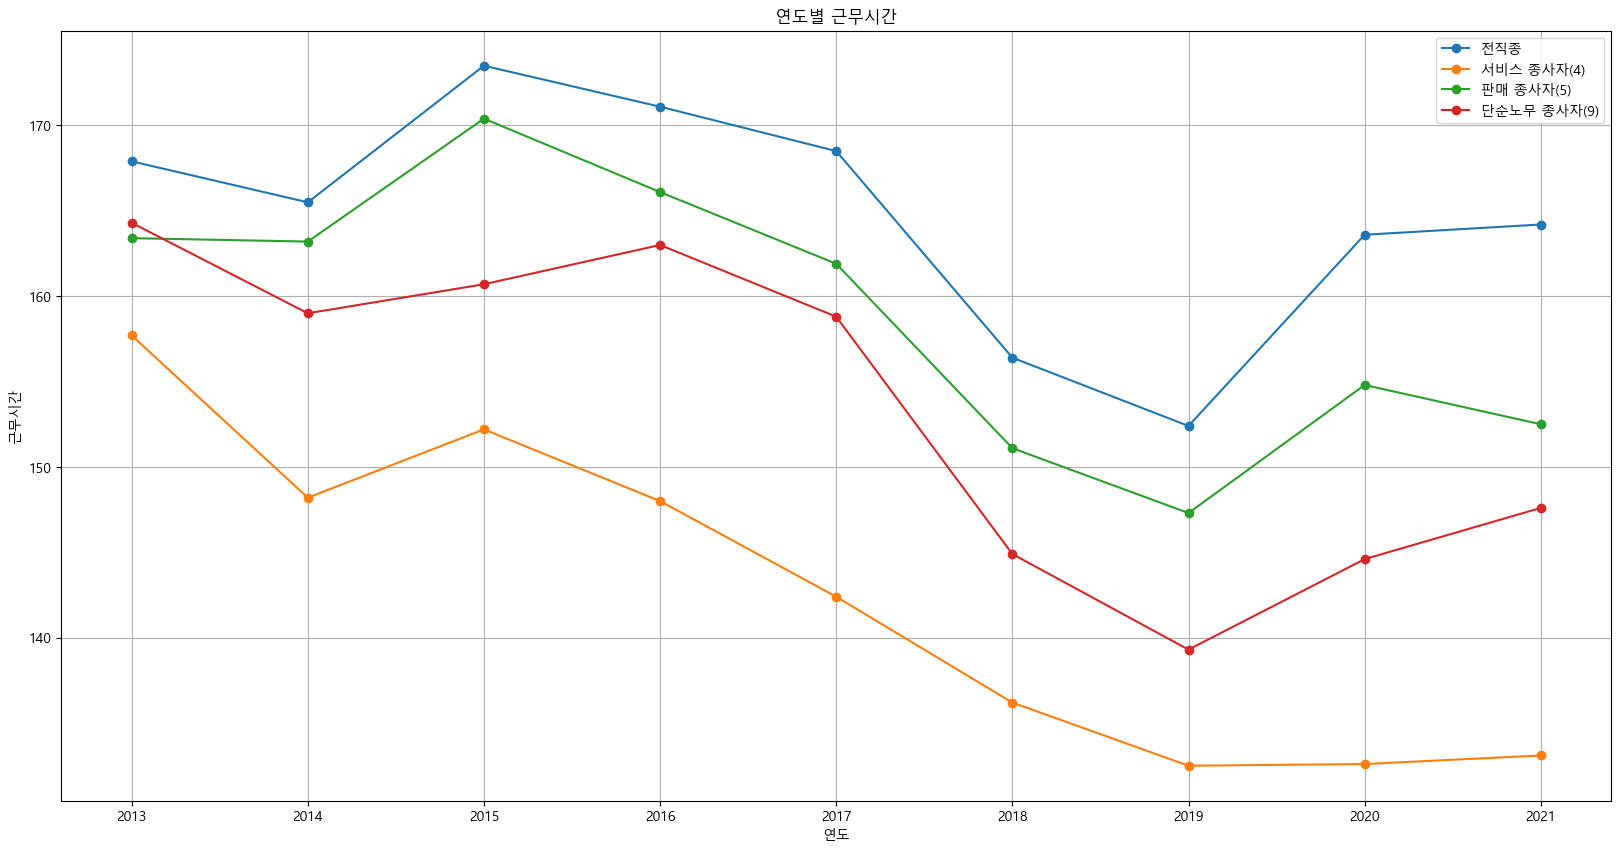

In [165]:
data_time.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)
plt.xlabel('연도')
plt.ylabel('근무시간')
plt.title('연도별 근무시간')

plt.show()


In [166]:
data_pay.set_index("한국표준직업분류6차")
data_pay = data_pay.transpose()
data_pay = data_pay.iloc[1:,:]
data_pay = data_pay.reset_index()
data_pay.columns = ["연도","전직종", "서비스 종사자(4)", "판매 종사자(5)", "단순노무 종사자(9)"]
data_pay
data_pay = data_pay.set_index("연도")

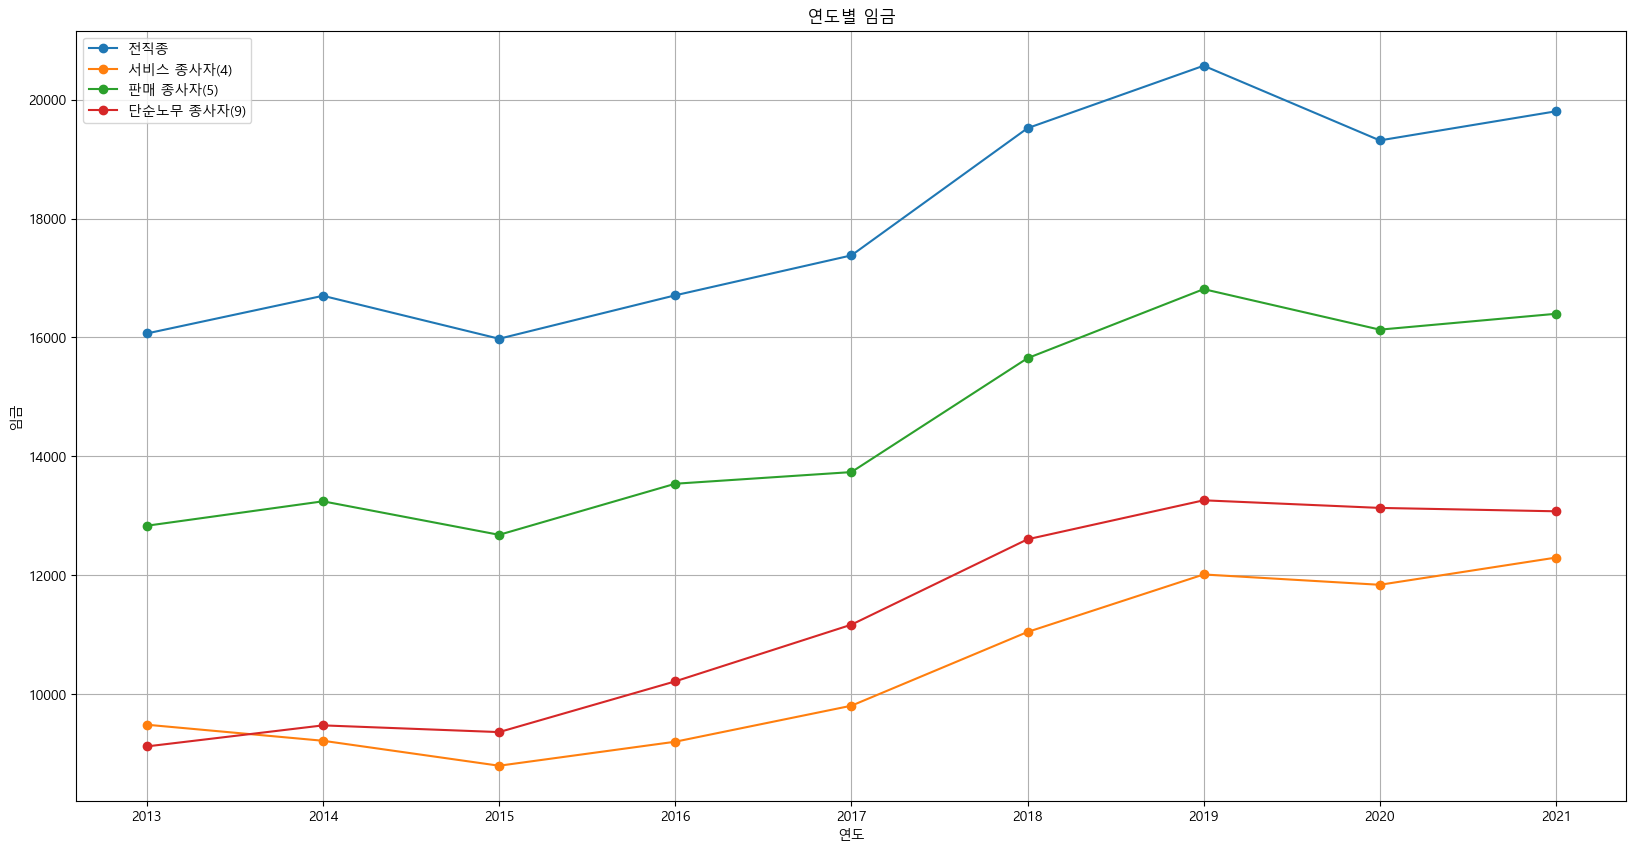

In [167]:
data_pay.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)
plt.xlabel('연도')
plt.ylabel('임금')
plt.title('연도별 임금')

plt.show()